# Conexion a la API Coin Gecko
* Dentro de mis busquedas para conectarme a la API de Coin Gecko, una de ellas fue parte el codigo que hay a continuacion, donde me tuve que descargar en el VSC la libreria pycoingecko, luego de estudiar entender como lo hacia, fui seleccionando en los otros archivos CSV que parte de la informacion iba a utilizar, por ende me iba a traer en cada notebook aparte


In [1]:
import pandas as pd
import datetime as dt
import time as t
import plotly.graph_objects as go
from plotly.offline import plot
from pycoingecko import CoinGeckoAPI

In [2]:
#create a client
cg = CoinGeckoAPI()

#confirm connection
cg.ping()

{'gecko_says': '(V3) To the Moon!'}

In [3]:
#get a list of coins, sort df by id
coinList = cg.get_coins_list()
coinDataFrame = pd.DataFrame.from_dict(coinList).sort_values('id'
                                      ).reset_index(drop=True)

In [4]:
coinDataFrame.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0vix-protocol,vix,0VIX Protocol
3,0x,zrx,0x Protocol
4,0x0-ai-ai-smart-contract,0x0,0x0.ai: AI Smart Contract


In [5]:
coinDataFrame.shape

(10107, 3)

In [6]:
#btc/eth/dpx by id
#coinDataFrame[coinDataFrame['id'] == 'bitcoin']
#coinDataFrame[coinDataFrame['id'] == 'ethereum']
#coinDataFrame[coinDataFrame['id'] == 'dopex']
coins = ['bitcoin','ethereum','dopex']

In [7]:
coins

['bitcoin', 'ethereum', 'dopex']

In [8]:
#get list of suppored VS currencies
counterCurrencies = cg.get_supported_vs_currencies()
vsCurrencies = ['usd', 'eur', 'link']

print(counterCurrencies) ## es una lista---


['btc', 'eth', 'ltc', 'bch', 'bnb', 'eos', 'xrp', 'xlm', 'link', 'dot', 'yfi', 'usd', 'aed', 'ars', 'aud', 'bdt', 'bhd', 'bmd', 'brl', 'cad', 'chf', 'clp', 'cny', 'czk', 'dkk', 'eur', 'gbp', 'hkd', 'huf', 'idr', 'ils', 'inr', 'jpy', 'krw', 'kwd', 'lkr', 'mmk', 'mxn', 'myr', 'ngn', 'nok', 'nzd', 'php', 'pkr', 'pln', 'rub', 'sar', 'sek', 'sgd', 'thb', 'try', 'twd', 'uah', 'vef', 'vnd', 'zar', 'xdr', 'xag', 'xau', 'bits', 'sats']


In [9]:
##price=cg.get_price..no se como hcaer esto..la primera era lista de dict..esta es funcion


In [10]:
#most simple price request - nested dictionary format
simplePriceRequest = cg.get_price(ids = coins, vs_currencies = 'usd')
print(simplePriceRequest)

complexPriceRequest = cg.get_price(ids = coins, 
                        vs_currencies = vsCurrencies, 
                        include_market_cap = True,
                        include_24hr_vol = True,
                        include_24hr_change = True,
                        include_last_updated_at = True)
print(complexPriceRequest)

{'bitcoin': {'usd': 26363}, 'dopex': {'usd': 69.76}, 'ethereum': {'usd': 1679.58}}
{'bitcoin': {'usd': 26363, 'usd_market_cap': 513991300847.4794, 'usd_24h_vol': 34969245434.30708, 'usd_24h_change': -7.40509411291725, 'eur': 24283, 'eur_market_cap': 473041099917.6593, 'eur_24h_vol': 32210032092.558594, 'eur_24h_change': -7.0589981180858965, 'link': 4238, 'link_market_cap': 82452821086.16458, 'link_24h_vol': 5622207703.868821, 'link_24h_change': 1.4572001725026855, 'last_updated_at': 1692361791}, 'dopex': {'usd': 69.76, 'usd_market_cap': 18163856.669602253, 'usd_24h_vol': 531815.052635327, 'usd_24h_change': -2.6213478307117377, 'eur': 64.25, 'eur_market_cap': 16716724.044878352, 'eur_24h_vol': 489852.7177221903, 'eur_24h_change': -2.257371419968736, 'link': 11.215554, 'link_market_cap': 2913787.1044589216, 'link_24h_vol': 85502.97979911171, 'link_24h_change': 6.698800663139366, 'last_updated_at': 1692361792}, 'ethereum': {'usd': 1679.6, 'usd_market_cap': 202094355211.7968, 'usd_24h_vol'

In [50]:
type(complexPriceRequest)

dict

In [52]:
complexpriceDF= pd.DataFrame.from_dict(complexPriceRequest)
complexpriceDF

,bitcoin,dopex,ethereum
usd,2.636300e+04,6.976000e+01,1.679600e+03
usd_market_cap,5.139913e+11,1.816386e+07,2.020944e+11
usd_24h_vol,3.496925e+10,5.318151e+05,2.653313e+10
usd_24h_change,-7.405094e+00,-2.621348e+00,-5.989759e+00
eur,2.428300e+04,6.425000e+01,1.547080e+03
eur_market_cap,4.730411e+11,1.671672e+07,1.859933e+11
eur_24h_vol,3.221003e+10,4.898527e+05,2.443956e+10
eur_24h_change,-7.058998e+00,-2.257371e+00,-5.638373e+00
link,4.238000e+03,1.121555e+01,2.700400e+02
link_market_cap,8.245282e+10,2.913787e+06,3.241932e+10


In [11]:
#get all asset platforms
assetPlatformsList = cg.get_asset_platforms()
assetPlatforms = pd.DataFrame.from_dict(assetPlatformsList
                   ).sort_values('id').reset_index(drop=True)
assetPlatforms.head()

,id,chain_identifier,name,shortname
0,,NaN,Picasso,
1,,NaN,Alephium,
2,,NaN,Matrix,
3,,NaN,Radix,
4,Bitcichain,NaN,Bitcichain,Bitcichain


In [12]:
#assetPlatforms[assetPlatforms['id'] == 'binance-smart-chain']
#get AVAX token price (using contract address) from BSC (asset platform)
AVAXpriceBSC = cg.get_token_price(id = 'binance-smart-chain', 
                   contract_addresses = '0x1ce0c2827e2ef14d5c4f' +
                                        '29a091d735a204794041',
                   vs_currencies = 'usd')

In [13]:
AVAXpriceBSC

{'0x1ce0c2827e2ef14d5c4f29a091d735a204794041': {'usd': 10.86}}

In [14]:
#get coins categories, privacy-coins, stablecoins, gambling, lp-tokens, etc.
coinCategoriesList = pd.DataFrame(cg.get_coins_categories_list())
#get data on coin categories
coinCategoriesData = pd.DataFrame(cg.get_coins_categories(
                                                order = 'market_cap_desc'))
#dictionary to dataframe
coinCategoriesDataFrame = pd.DataFrame.from_dict(coinCategoriesData
                                ).sort_values('market_cap', ascending=False).reset_index(drop=True) 
##cambio y ordeno por market_Cap, antes estaba por id


In [15]:
coinCategoriesDataFrame.head()

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,layer-1,Layer 1 (L1),7.954064e+11,-7.419778,,[https://assets.coingecko.com/coins/images/1/s...,5.869713e+10,2023-08-18T11:45:22.947Z
1,smart-contract-platform,Smart Contract Platform,3.089811e+11,-6.355037,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,3.253087e+10,2023-08-18T11:45:06.557Z
2,stablecoins,Stablecoins,1.245755e+11,0.219415,,[https://assets.coingecko.com/coins/images/325...,5.295316e+10,2023-08-18T11:45:06.230Z
3,alleged-sec-securities,Alleged SEC Securities,8.331577e+10,-4.859313,Tokens and cryptocurrencies alleged to be secu...,[https://assets.coingecko.com/coins/images/825...,1.014960e+10,2023-08-18T11:45:01.345Z
4,exchange-based-tokens,Exchange-based Tokens,5.368463e+10,-5.443283,These tokens are normally associated with both...,[https://assets.coingecko.com/coins/images/825...,2.070145e+09,2023-08-18T11:45:08.298Z


In [16]:
#get coins market cap, rank, prices, volume, market data, etc.
#by ID using a list
coinsMktDataByIds = cg.get_coins_markets(vs_currency = 'usd',
                                        ids = coins)
coinsMktDataByIds

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 26363,
  'market_cap': 513991300847,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 554639623963,
  'total_volume': 34969245434,
  'high_24h': 28521,
  'low_24h': 25649,
  'price_change_24h': -2108.298649927612,
  'price_change_percentage_24h': -7.40509,
  'market_cap_change_24h': -39435379292.18909,
  'market_cap_change_percentage_24h': -7.12567,
  'circulating_supply': 19460956.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -61.63302,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 38966.18958,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-18T12:29:51.393Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethe

In [17]:
#by category see cg.get_coins_categories_list(), in order
coinsMktDataByCategory = cg.get_coins_markets(vs_currency = 'usd',
                                    category = 'stablecoins',
                                    order = 'volume_desc')
coinsMktDataByCategory

[{'id': 'tether',
  'symbol': 'usdt',
  'name': 'Tether',
  'image': 'https://assets.coingecko.com/coins/images/325/large/Tether.png?1668148663',
  'current_price': 0.999617,
  'market_cap': 82880304599,
  'market_cap_rank': 3,
  'fully_diluted_valuation': 82880304599,
  'total_volume': 43092076636,
  'high_24h': 1.022,
  'low_24h': 0.98644,
  'price_change_24h': 0.00086153,
  'price_change_percentage_24h': 0.08626,
  'market_cap_change_24h': -14782154.129898071,
  'market_cap_change_percentage_24h': -0.01783,
  'circulating_supply': 82842337234.0993,
  'total_supply': 82842337234.0993,
  'max_supply': None,
  'ath': 1.32,
  'ath_change_percentage': -24.40849,
  'ath_date': '2018-07-24T00:00:00.000Z',
  'atl': 0.572521,
  'atl_change_percentage': 74.69187,
  'atl_date': '2015-03-02T00:00:00.000Z',
  'roi': None,
  'last_updated': '2023-08-18T12:29:24.261Z'},
 {'id': 'usd-coin',
  'symbol': 'usdc',
  'name': 'USD Coin',
  'image': 'https://assets.coingecko.com/coins/images/6319/large/US

In [18]:
#get coin data by ID, rate of change, sparkline chart data
coinsMktDataById = cg.get_coins_markets(vs_currency = 'usd',
                                      ids = 'bitcoin',
                                      price_change_percentage = '1h,24h,7d',
                                      sparkline = True)

In [19]:
#dictionary to dataframe
coinsMktDataFrame = pd.DataFrame.from_dict(coinsMktDataById).sort_values('id'
                                      ).reset_index(drop=True)

In [20]:
coinsMktDataFrame.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,sparkline_in_7d,price_change_percentage_1h_in_currency,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,26363,513991300847,1,554639623963,34969245434,28521,...,2021-11-10T14:24:11.849Z,67.81,38966.18958,2013-07-06T00:00:00.000Z,None,2023-08-18T12:29:51.393Z,"{'price': [29413.486940884017, 29379.607529334...",-0.077327,-7.405094,-10.372325


In [21]:
#get list of exchanges
exchgList = cg.get_exchanges_list(per_page = 250, page = 1)
exchgDataFrame = pd.DataFrame.from_dict(exchgList
                              ).sort_values('trade_volume_24h_btc_normalized',
                                            ascending = False
                              ).reset_index(drop=True)
    

In [22]:
exchgDataFrame.head()

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,5.751514e+05,425678.503885
1,digifinex,DigiFinex,2018.0,Seychelles,,https://www.digifinex.com/,https://assets.coingecko.com/markets/images/22...,False,6.0,74.0,1.130201e+06,122031.315597
2,okex,OKX,2017.0,Seychelles,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,False,9.0,8.0,1.151904e+05,114501.810764
3,whitebit,WhiteBIT,2018.0,Lithuania,,https://whitebit.com,https://assets.coingecko.com/markets/images/41...,False,8.0,14.0,9.109745e+04,91097.453544
4,gdax,Coinbase Exchange,2012.0,United States,,https://coinbase-consumer.sjv.io/coingecko,https://assets.coingecko.com/markets/images/23...,False,10.0,2.0,8.869637e+04,88696.368617


In [23]:
#get exchanges ids              
exchgIds = cg.get_exchanges_id_name_list()                             
exchgIdsDataFrame = pd.DataFrame.from_dict(exchgIds
                              ).sort_values('id'
                              ).reset_index(drop=True)

In [24]:
exchgIdsDataFrame.head()

,id,name
0,1bch,1BCH
1,3xcalibur,3xcalibur
2,aave,Aave
3,abcc,ABCC
4,acala_swap,Acala Swap


In [25]:
#get exchange data by id // max of 100 results in exchgById['tickers']                                           
exchgById = cg.get_exchanges_by_id(id = 'binance')    
print(exchgById.keys())
exchgDataFrameById = pd.DataFrame(exchgById['tickers'])
print(exchgDataFrameById.columns)     

dict_keys(['name', 'year_established', 'country', 'description', 'url', 'image', 'facebook_url', 'reddit_url', 'telegram_url', 'slack_url', 'other_url_1', 'other_url_2', 'twitter_handle', 'has_trading_incentive', 'centralized', 'public_notice', 'alert_notice', 'trust_score', 'trust_score_rank', 'trade_volume_24h_btc', 'trade_volume_24h_btc_normalized', 'tickers', 'status_updates'])
Index(['base', 'target', 'market', 'last', 'volume', 'converted_last',
       'converted_volume', 'trust_score', 'bid_ask_spread_percentage',
       'timestamp', 'last_traded_at', 'last_fetch_at', 'is_anomaly',
       'is_stale', 'trade_url', 'token_info_url', 'coin_id', 'target_coin_id'],
      dtype='object')


In [26]:
#the same as exchgById['tickers'] but can input multiple ids + pages
exchgTickersByID = cg.get_exchanges_tickers_by_id(id = 'binance', 
                                            coin_ids = ['bitcoin','ethereum'],
                                            page = 1, 
                                            depth = True, 
                                            order = 'volume_desc')

In [27]:
#get exchg volume (in BTC?) // days param has a limit, returns 503 errors
exchgVolume = cg.get_exchanges_volume_chart_by_id(id='binance', days= '1')

In [28]:
#list to dataframe
exchgVolumeDataFrame = pd.DataFrame(exchgVolume,  columns = ['Date', 'Volume'])
exchgVolumeDataFrame.head()

,Date,Volume
0,1.692276e+12,277499.4080188274558061
1,1.692277e+12,277162.1816636339204708
2,1.692277e+12,275548.8285695376815329
3,1.692278e+12,275665.4064221651053132
4,1.692278e+12,275269.0490832196085886


<Axes: xlabel='Date'>

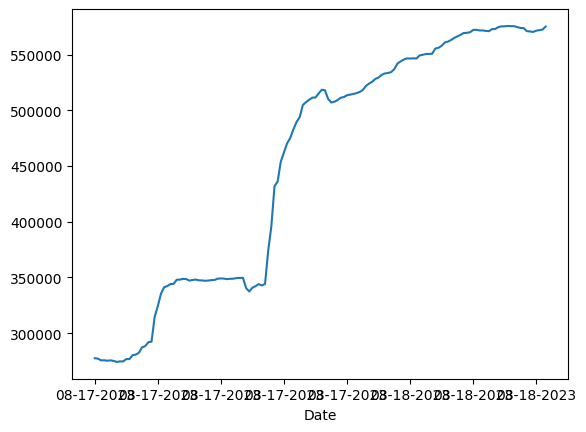

In [29]:
#reformat date
exchgVolumeDataFrame['Date'] = exchgVolumeDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#reformat volume
exchgVolumeDataFrame['Volume'] = pd.to_numeric(exchgVolumeDataFrame['Volume'])

#set index
exchgVolumeDataFrame = exchgVolumeDataFrame.set_index('Date')

#plot
exchgVolumeDataFrame['Volume'].plot()




In [30]:
#get coin ticker by id / limited to 100, by page
mktSpecificData = cg.get_coin_ticker_by_id(id = 'bitcoin',
                                           exchange_id ='aave',
                                           page = 2,
                                           depth = True)
#dictionary to dataframe
mktSpecificDataFrame = pd.DataFrame.from_dict(mktSpecificData['tickers']
                                  ).sort_values('base').reset_index(drop=True)

In [31]:
#get coin history by SINGLE id
coinHistory = cg.get_coin_history_by_id(id = 'bitcoin', 
                              date = dt.datetime.today().strftime('%d-%m-%Y'))
coinHistory


{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 97341.2575979696,
   'ars': 9273742.835902637,
   'aud': 41369.

In [32]:
#get daily historical data
dailyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 'max')


In [33]:
dailyHistoricalData

{'prices': [[1367107200000, 135.3],
  [1367193600000, 141.96],
  [1367280000000, 135.3],
  [1367366400000, 117.0],
  [1367452800000, 103.43],
  [1367539200000, 91.01],
  [1367625600000, 111.25],
  [1367712000000, 116.79],
  [1367798400000, 118.33],
  [1367884800000, 106.4],
  [1367971200000, 112.64],
  [1368057600000, 113.0],
  [1368144000000, 118.78],
  [1368230400000, 113.01],
  [1368316800000, 114.713],
  [1368403200000, 117.18],
  [1368489600000, 114.5],
  [1368576000000, 114.156],
  [1368662400000, 115.5],
  [1368748800000, 123.1],
  [1368835200000, 123.88],
  [1368921600000, 120.501],
  [1369008000000, 122.58],
  [1369094400000, 122.9],
  [1369180800000, 123.0],
  [1369267200000, 125.748],
  [1369353600000, 131.7],
  [1369440000000, 130.77],
  [1369526400000, 134.6],
  [1369612800000, 128.985],
  [1369699200000, 129.179],
  [1369785600000, 132.13],
  [1369872000000, 127.401],
  [1369958400000, 127.98],
  [1370044800000, 129.09],
  [1370131200000, 121.3],
  [1370217600000, 121.16]

In [34]:
#get hourly historical data
hourlyHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 90)

#get 5 minute historical data
fiveMinHistoricalData = cg.get_coin_market_chart_by_id(id = 'bitcoin', 
                               vs_currency = 'usd',
                               days = 1)

In [35]:
#input a range of timestamps to get data for - using predetermined frequency
chartRange = cg.get_coin_market_chart_range_by_id(id = 'bitcoin', 
                                                  vs_currency = 'usd', 
                                                  from_timestamp = 1392577232, 
                                                  to_timestamp = 1422577232)

In [36]:
#chartRange

In [37]:
#list of lists to dataframe 
dailyHistoricalDataFrame = pd.DataFrame(data = dailyHistoricalData['prices'],
                                        columns = ['Date', 'Price'])
#reformat date
dailyHistoricalDataFrame['Date'] = dailyHistoricalDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
dailyHistoricalDataFrame = dailyHistoricalDataFrame.set_index('Date')

In [38]:
dailyHistoricalDataFrame.head()

,Price
Date,
04-27-2013,135.30
04-28-2013,141.96
04-29-2013,135.30
04-30-2013,117.00
05-01-2013,103.43


In [39]:
dailyHistoricalDataFrame.reset_index()

,Date,Price
0,04-27-2013,135.300000
1,04-28-2013,141.960000
2,04-29-2013,135.300000
3,04-30-2013,117.000000
4,05-01-2013,103.430000
...,...,...
3759,08-14-2023,29400.586804
3760,08-15-2023,29170.490397
3761,08-16-2023,28754.197021
3762,08-17-2023,26501.587270


<Axes: xlabel='Date'>

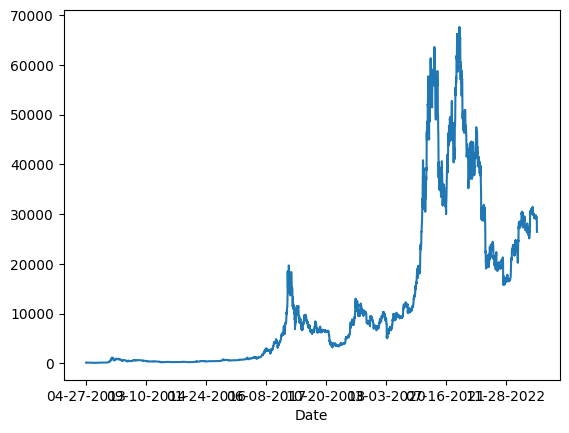

In [40]:
#plot
dailyHistoricalDataFrame['Price'].plot()

In [41]:
#get OHLC data for preset range 1/7/14/30/90/180/365/max
#candle body width by date range 
#1 - 2 days: 30 minutes
#3 - 30 days: 4 hours
#31 days and beyond: 4 days
ohlcData = cg.get_coin_ohlc_by_id(id = 'bitcoin', 
                                  vs_currency = 'usd', 
                                  days = '14')
#list to dataframe
ohlcDataFrame = pd.DataFrame(data = ohlcData,
                           columns = ['Date', 'Open', 'High' ,'Low', 'Close'])
#reformat date
ohlcDataFrame['Date'] = ohlcDataFrame['Date'].apply(
                        lambda x: dt.datetime.fromtimestamp(x/1000
                        ).strftime('%m-%d-%Y %H:%M:%S'))
#set index
ohlcDataFrame = ohlcDataFrame.set_index('Date')

In [42]:
#generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=ohlcDataFrame.index,
                open=ohlcDataFrame['Open'],
                high=ohlcDataFrame['High'],
                low=ohlcDataFrame['Low'],
                close=ohlcDataFrame['Close'])])

In [43]:
#open figure in browser
#plot(fig, auto_open=True)

In [44]:
#get coin info from contract address
coinInfoByAddress = cg.get_coin_info_from_contract_address_by_id(
                               id = 'binance-smart-chain', 
                               contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                                  '29a091d735a204794041')
#display
print(coinInfoByAddress['market_data'].keys())
print(coinInfoByAddress['tickers'])

dict_keys(['current_price', 'total_value_locked', 'mcap_to_tvl_ratio', 'fdv_to_tvl_ratio', 'roi', 'ath', 'ath_change_percentage', 'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'market_cap', 'market_cap_rank', 'fully_diluted_valuation', 'total_volume', 'high_24h', 'low_24h', 'price_change_24h', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'market_cap_change_24h', 'market_cap_change_percentage_24h', 'price_change_24h_in_currency', 'price_change_percentage_1h_in_currency', 'price_change_percentage_24h_in_currency', 'price_change_percentage_7d_in_currency', 'price_change_percentage_14d_in_currency', 'price_change_percentage_30d_in_currency', 'price_change_percentage_60d_in_currency', 'price_change_percentage_200d_in_currency', 'price_change_percentage_1y_in_currency', 'market_cap_change_24h_in_currency', 'market

In [45]:
#get historical market data - price, mkt cap, and volume / days = 1 to 'max'
#similar data points to .get_coin_market_chart_by_id()
coinChartData = cg.get_coin_market_chart_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            days = 'max')

In [46]:
coinChartDataRng = cg.get_coin_market_chart_range_from_contract_address_by_id(
                            id = 'binance-smart-chain', 
                            contract_address = '0x1ce0c2827e2ef14d5c4f' +
                                               '29a091d735a204794041',
                            vs_currency = 'usd',
                            from_timestamp = t.time()-100000, 
                            to_timestamp = t.time())

In [47]:
#display
print(coinChartData.keys())

dict_keys(['prices', 'market_caps', 'total_volumes'])


<Axes: xlabel='Date'>

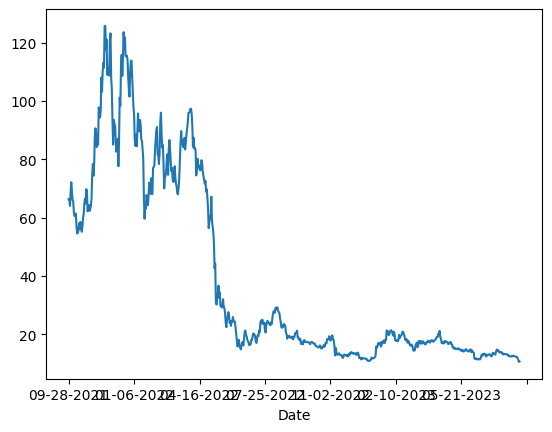

In [48]:
#list of lists to dataframe 
coinChartDataFrame = pd.DataFrame(data = coinChartData['prices'],
                                        columns = ['Date', 'Price'])
#reformat date
coinChartDataFrame['Date'] = coinChartDataFrame['Date'].apply(
             lambda x: dt.datetime.fromtimestamp(x/1000).strftime('%m-%d-%Y'))
#set index
coinChartDataFrame = coinChartDataFrame.set_index('Date')

#plot
coinChartDataFrame['Price'].plot()

In [49]:
#get limited index data // name, id , market, last price
indexData = cg.get_indexes()

#get index ids, names
indexIds = cg.get_indexes_list()
indexIdsDataFrame = pd.DataFrame(indexIds).sort_values('id'
                                                       ).reset_index(drop=True)

#get all derivatives tickers
derivTickers = cg.get_derivatives()

#list to dataframe
derivTickersDataFrame = pd.DataFrame(derivTickers).sort_values('symbol'
                                                ).reset_index(drop=True)

#get derivatives exchanges + data
derivExchg = cg.get_derivatives_exchanges()       
#list to dataframe        
derivExchgDataFrame = pd.DataFrame(derivExchg).sort_values('id'
                                                ).reset_index(drop=True)

#get exchanges ordered by open interest
print(derivExchgDataFrame.sort_values('open_interest_btc',
                                       ascending = False
                                       ).reset_index(drop=True
                                       )[['id','open_interest_btc']].dropna())

#get exchange ids
derivExchgId = cg.get_derivatives_exchanges_list()

#list to dataframe
derivExchgIdDataFrame = pd.DataFrame(derivExchgId).sort_values('id'
                                                 ).reset_index(drop=True)
#display
print(derivExchgIdDataFrame['id'].head(20))

#get single exchange data by id + ticker data
print(cg.get_derivatives_exchanges_by_id(id = 'binance_futures'))
#with tickers
singleExchgData = cg.get_derivatives_exchanges_by_id(id = 'binance_futures',
                                                     include_tickers = 'all')
#ticker data list to dataframe
singleExchgTickerData = pd.DataFrame(singleExchgData['tickers']
                                     ).sort_values('symbol'
                                     ).reset_index(drop=True)

#get exchange rates
exchangeRates = cg.get_exchange_rates()
#list to dataframe
exchangeRatesDataFrame = pd.DataFrame(exchangeRates['rates'])

#get trending search coins 
trendingCoins = cg.get_search_trending()['coins']


#get global cryptcurrency data // not too useful
globalData = cg.get_global()
print(globalData.keys())


#get global defi data 
globalDefiData = cg.get_global_decentralized_finance_defi()

#get public companies bitcoin or ethereum holdings
publicBTC = cg.get_companies_public_treasury_by_coin_id(coin_id = 'bitcoin')
publicETH = cg.get_companies_public_treasury_by_coin_id(coin_id = 'ethereum')

                        id  open_interest_btc
0          binance_futures          273666.72
1                    bybit          157425.37
2     deepcoin_derivatives          154052.87
3           phemex_futures          124330.41
4                okex_swap          108038.92
5           bitget_futures          104885.92
6                prime_xbt           85755.38
7            bingx_futures           64054.01
8                  deribit           51526.92
9                    kumex           45708.47
10             mxc_futures           38710.27
11            gate_futures           32536.05
12         bitmart_futures           19140.62
13        bitfinex_futures           18015.20
14                  bitmex           14179.05
15      toobit_derivatives           13360.47
16          bitrue_futures           10845.69
17          dydx_perpetual            9411.00
18      cointr_derivatives            8063.43
19        whitebit_futures            7534.07
20          kraken_futures        

KeyboardInterrupt: 